In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
import time
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

In [2]:
from keras import backend as K
print(K.backend())

tensorflow


CIFAR-10 Luokitteluprojekti
Projektin tavoite
Tämän ryhmäprojektin tarkoituksena on soveltaa neuroverkkotekniikoita CIFAR-10 kuvaluokitteluongelmaan. Tavoitteena on vertailla kahta erilaista neuroverkkoarkkitehtuuria: täysin yhdistettyä verkkoa (FCN) sekä konvoluutioneuroverkoa (CNN).

Tehtävänanto
Toteuta CIFAR-10 datasetin luokittelu kahdella erillisellä Jupyter Notebookilla:

Käytä täysin yhdistettyä neuroverkkoa (Fully Connected Network, FCN)
Käytä konvoluutioneuroverkkoa (Convolutional Neural Network, CNN)
Voit käyttää mallina ja pohjana MNIST-datasetille tehtyjä työkirjoja:

MNIST_Keras.ipynb
MNIST_Keras_CNN.ipynb
https://github.com/mikkopere/Neuroverkkoprojekti

Vertaile näiden mallien:

Suorituskykyä (tarkkuus testidatalla)
Oppimiskäyrää (training vs. validation loss)
Parametrien määrää
Opetusaikaa
Visualisoi tuloksia:

Näytä esimerkkikuvia ja mallien luokittelutuloksia
Esitä luokkien todennäköisyysjakaumia
Analysoi väärin luokiteltuja kuvia
Ideoita kokeiltavaksi:

Kokeile erilaisia esikäsittelytekniikoita värikuville
Testaa erilaisia verkkoarkkitehtuureja (kerrosten määrä, neuronien määrä)
Kokeile regularisointitekniikoita (dropout, batch normalization)
Tutki data-augmentation -tekniikoiden vaikutusta
Analysoi miksi CNN yleensä toimii paremmin kuvadatalle kuin FCN. Kuinka suureen tarkkuuteen pääset ei malleilla. Realistiset ja toisaalta kunnianhimoiset tavoitteet eli malleilla voisivat olla:

Fully Connected Network (FCN):

realistinen tavoite 50-55 % tarkkuus
kunnianhmoinen tavoite 57-60 % tarkkuus

Convolutional Neural Network (CNN):

realistinen tavoite 75-80 % tarkkuus
kunnianhimoinen tavoite 82-85 % tarkkuus

In [1]:
#keras.datasets.cifar10.load_data()


# FCN

In [24]:
# Create the model
inputs = keras.Input(shape=(3072,))
x = layers.Dense(256, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(x)
model_fcn = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [4]:
model_fcn.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 789258 (3.01 MB)
Trainable params: 789258 (3.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.reshape(50000, 32*32*3).astype("float32") / 255
x_test = x_test.reshape(10000, 32*32*3).astype("float32") / 255



In [30]:
model_fcn.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.AdamW(),
    metrics=["accuracy"]
)

In [31]:

start_time = time.time()
history = model_fcn.fit(x_train, y_train, batch_size=256, epochs=50, validation_split=0.05)

fcn_time = time.time() - start_time
fcn_score = model_fcn.evaluate(x_test.reshape(10000, 32*32*3), y_test, verbose=0)

# Save FCN results
fcn_results = {
    "accuracy": fcn_score[1],
    "time": fcn_time,
    "history": history.history
}


Epoch 1/50
186/186 [==============================] - 3s 14ms/step - loss: 1.9978 - accuracy: 0.2899 - val_loss: 1.8807 - val_accuracy: 0.3192
Epoch 2/50
186/186 [==============================] - 2s 13ms/step - loss: 1.7884 - accuracy: 0.3664 - val_loss: 1.7811 - val_accuracy: 0.3692
Epoch 3/50
186/186 [==============================] - 3s 13ms/step - loss: 1.7160 - accuracy: 0.3944 - val_loss: 1.7260 - val_accuracy: 0.3892
Epoch 4/50
186/186 [==============================] - 2s 13ms/step - loss: 1.6622 - accuracy: 0.4112 - val_loss: 1.6616 - val_accuracy: 0.4192
Epoch 5/50
186/186 [==============================] - 2s 12ms/step - loss: 1.6244 - accuracy: 0.4256 - val_loss: 1.6780 - val_accuracy: 0.4104
Epoch 6/50
186/186 [==============================] - 2s 12ms/step - loss: 1.6043 - accuracy: 0.4338 - val_loss: 1.6503 - val_accuracy: 0.4116
Epoch 7/50
186/186 [==============================] - 2s 12ms/step - loss: 1.5733 - accuracy: 0.4445 - val_loss: 1.6249 - val_accuracy: 0.4300

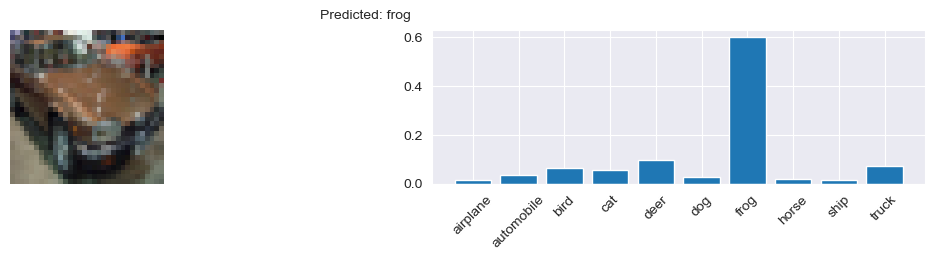

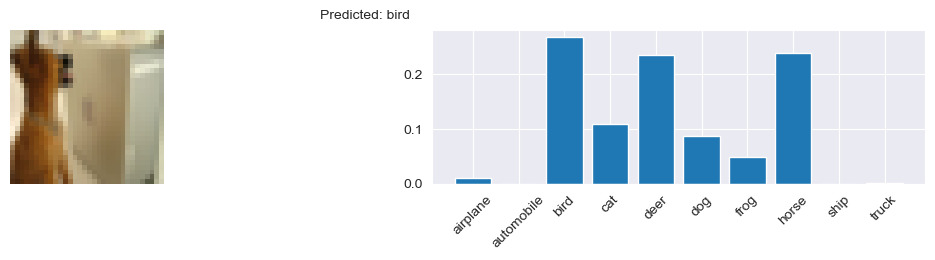

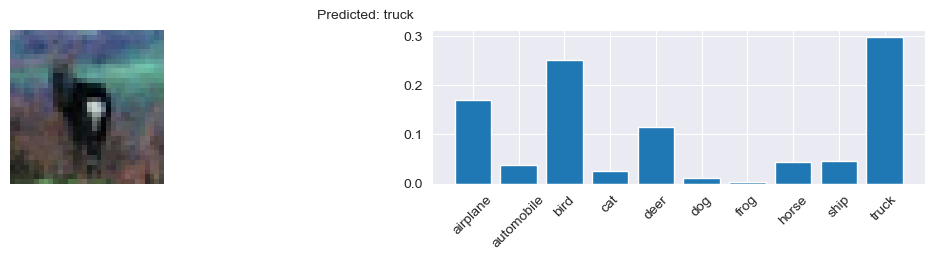

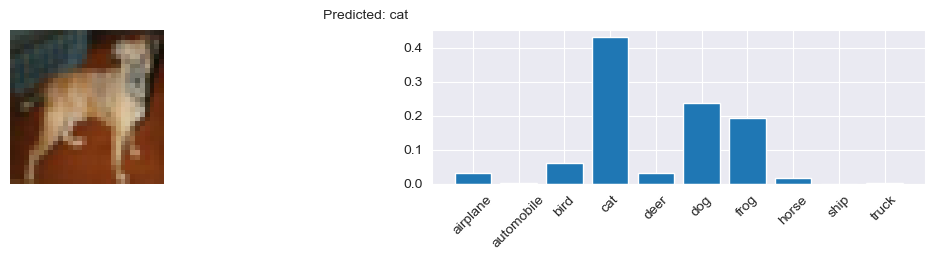

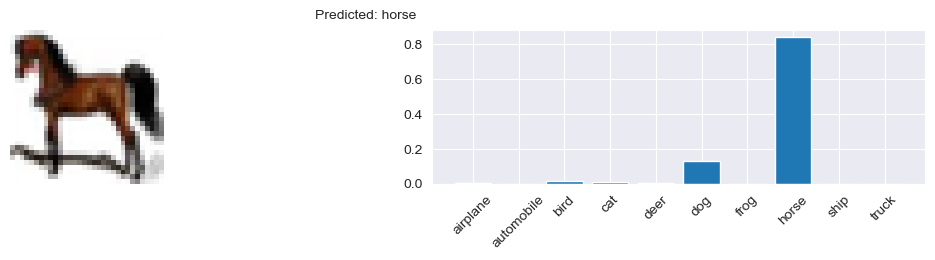

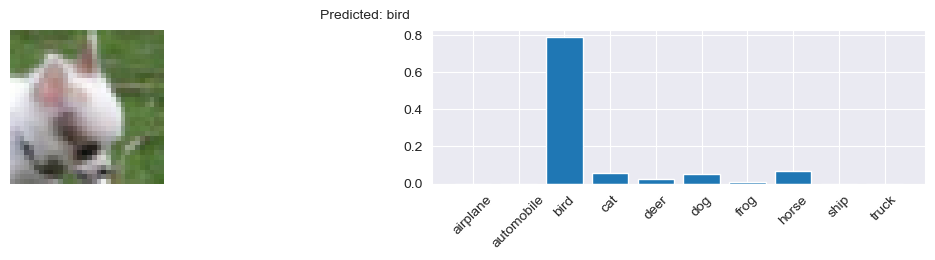

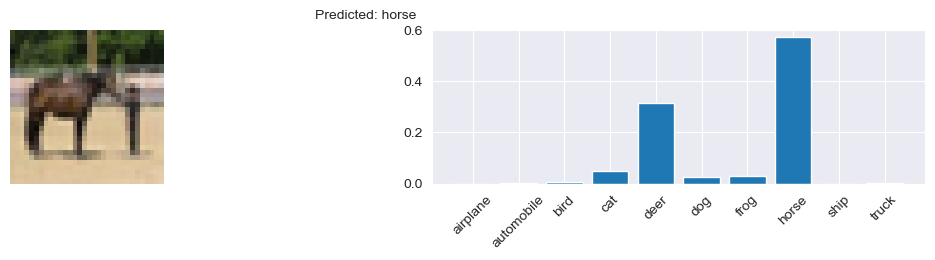

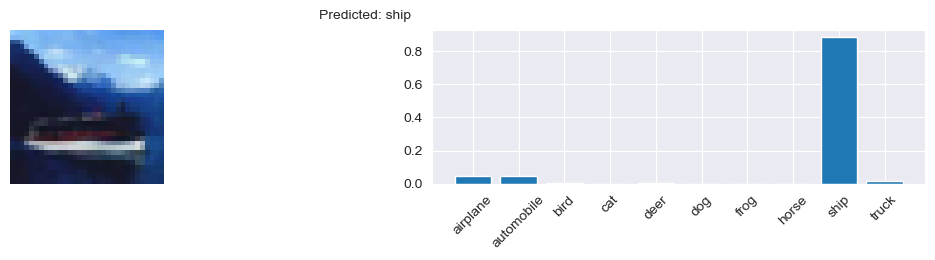

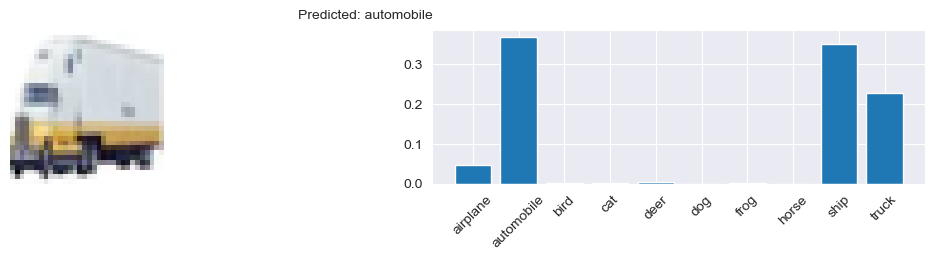

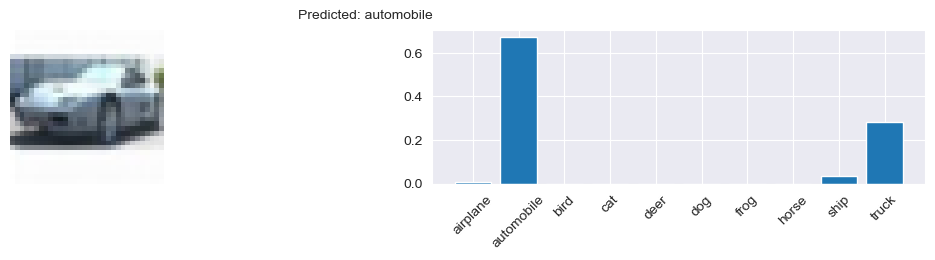

In [11]:
x = x_test
y = model_fcn(x)
start = 2000

label_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

for k in range(10):
    plt.figure(figsize=(14, 2))

    # Display the image
    plt.subplot(1, 2, 1)
    plt.imshow(x[start + k].reshape((32, 32, 3)))
    plt.axis("off")

    # Display the prediction probabilities
    ind = np.arange(0, 10)
    plt.subplot(1, 2, 2)
    plt.bar(ind, y[start + k].numpy().flatten())  # Flatten prediction array
    plt.xticks(ind, label_names, rotation=45)  # Map labels to class names

    # Find the predicted class with the highest probability
    predicted_class_index = np.argmax(y[start + k].numpy())  # Index of highest probability
    predicted_class = label_names[predicted_class_index]  # Map index to class name

    # Set the title as the predicted class
    plt.suptitle(f"Predicted: {predicted_class}", fontsize=10)

    plt.show()

# CNN


In [12]:
keras.datasets.cifar10.load_data()
num_classes = 10

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [33]:
# Create the model
inputs_cnn = keras.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs_cnn)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model_cnn = keras.Model(inputs=inputs_cnn, outputs=outputs, name="mnist_model_cnn")

In [14]:
model_cnn.summary()

Model: "mnist_model_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)          

In [15]:
batch_size = 256
epochs = 80

model_cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start_time = time.time()
history = model_cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.05)

cnn_time = time.time() - start_time
cnn_score = model_cnn.evaluate(x_test, y_test, verbose=0)

# Save CNN results
cnn_results = {
    "accuracy": cnn_score[1],
    "time": cnn_time,
    "history": history.history
}


Epoch 1/80
186/186 [==============================] - 15s 75ms/step - loss: 1.8006 - accuracy: 0.3511 - val_loss: 1.5234 - val_accuracy: 0.4652
Epoch 2/80
186/186 [==============================] - 13s 72ms/step - loss: 1.4592 - accuracy: 0.4813 - val_loss: 1.3616 - val_accuracy: 0.5308
Epoch 3/80
186/186 [==============================] - 15s 81ms/step - loss: 1.3411 - accuracy: 0.5254 - val_loss: 1.2845 - val_accuracy: 0.5572
Epoch 4/80
186/186 [==============================] - 15s 81ms/step - loss: 1.2715 - accuracy: 0.5536 - val_loss: 1.2018 - val_accuracy: 0.5948
Epoch 5/80
186/186 [==============================] - 16s 87ms/step - loss: 1.2273 - accuracy: 0.5717 - val_loss: 1.1395 - val_accuracy: 0.6084
Epoch 6/80
186/186 [==============================] - 15s 82ms/step - loss: 1.1802 - accuracy: 0.5882 - val_loss: 1.1126 - val_accuracy: 0.6348
Epoch 7/80
186/186 [==============================] - 15s 81ms/step - loss: 1.1388 - accuracy: 0.6050 - val_loss: 1.0722 - val_accuracy:

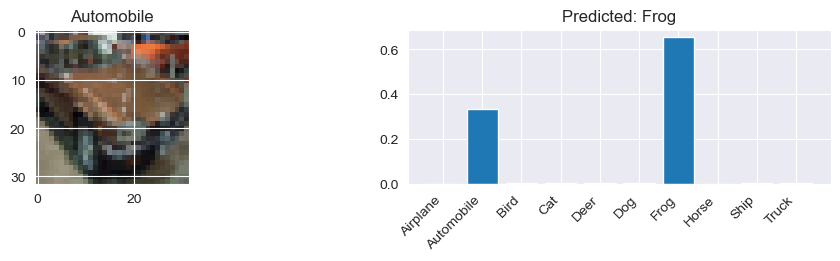

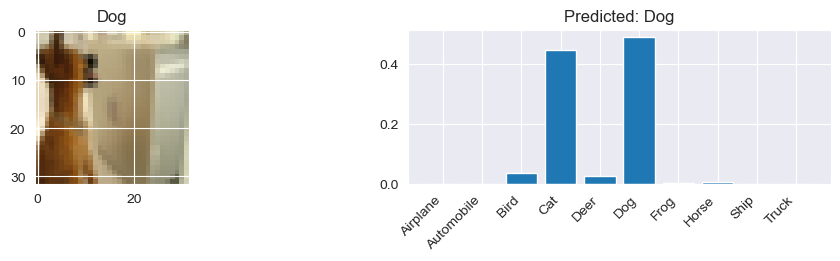

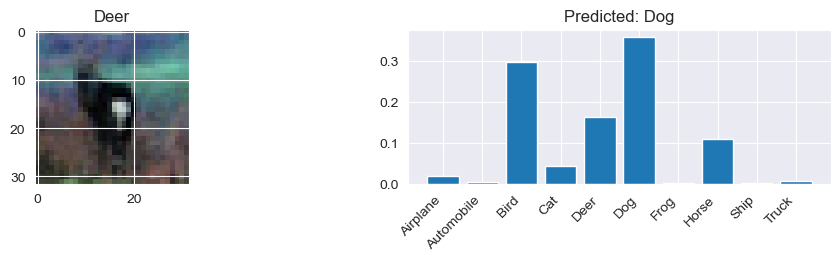

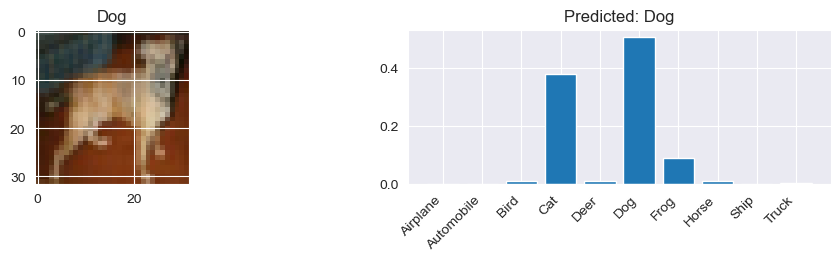

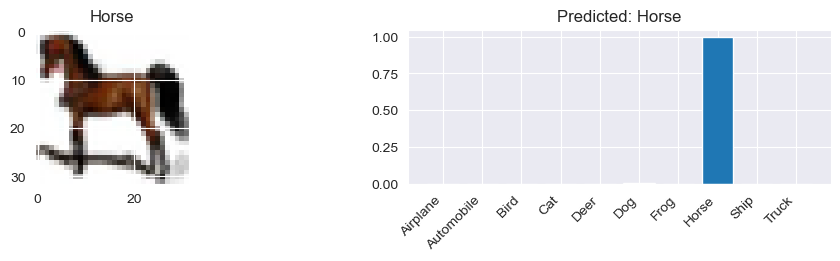

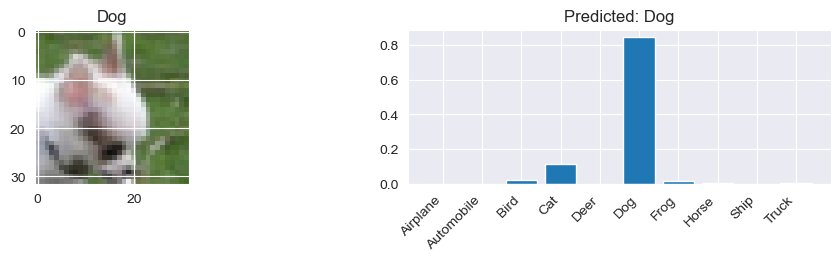

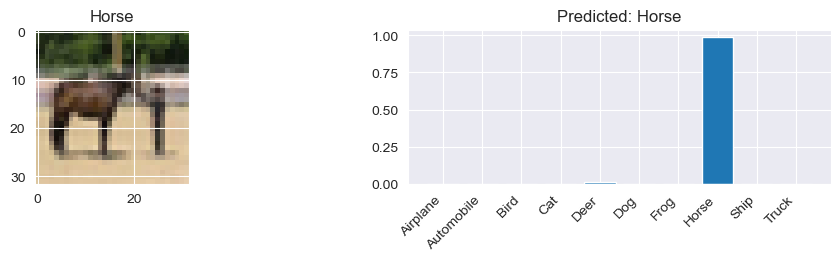

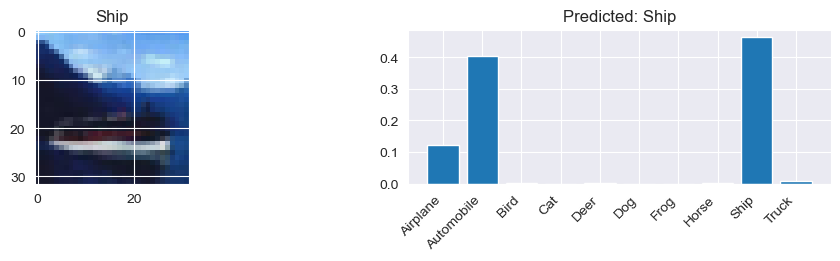

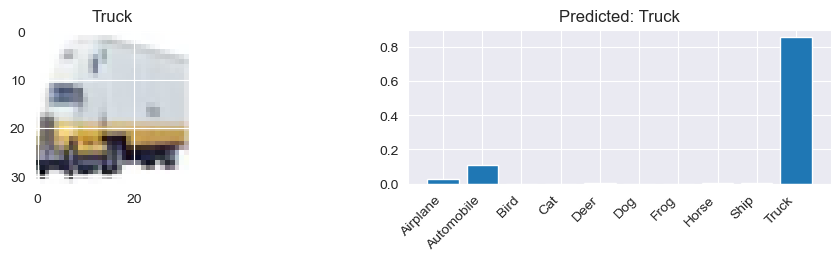

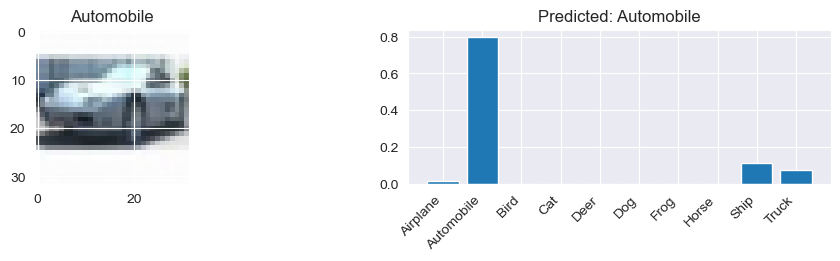

In [17]:
names = {0: "Airplane", 1: "Automobile", 2: "Bird", 3: "Cat", 
         4: "Deer", 5: "Dog", 6: "Frog", 7: "Horse", 8: "Ship", 9: "Truck"}

x = x_test
y = model_cnn(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(12, 2))
    plt.subplot(1,2,1)
  
    plt.title(names[np.argmax(y_test[start+k])])
    plt.imshow(x[start+k])
    
    if x_test.shape[1] == 3072:
        x_test = x_test.reshape(-1, 32, 32, 3)
        
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
   
    plt.bar(ind, y[start+k].numpy().flatten()) 
    
   # Find the predicted class with the highest probability
    predicted_class_index = np.argmax(y[start + k].numpy())  # Index of highest probability
    predicted_class = names[predicted_class_index] 
    
     # Set the title as the predicted class
    plt.title(f"Predicted: {predicted_class}")
    
    # Tensorflow
    plt.xticks(range(10), [names[i] for i in range(10)], rotation=45, ha="right")

## FCN ja CNN tuloksien vertailu

FCN Test accuracy: 0.48330000042915344
CNN Test accuracy: 0.7434999942779541
FCN Training time: 2 minutes and 9 seconds
CNN Training time: 21 minutes and 16 seconds
FCN Number of parameters: 789258
CNN Number of parameters: 42442


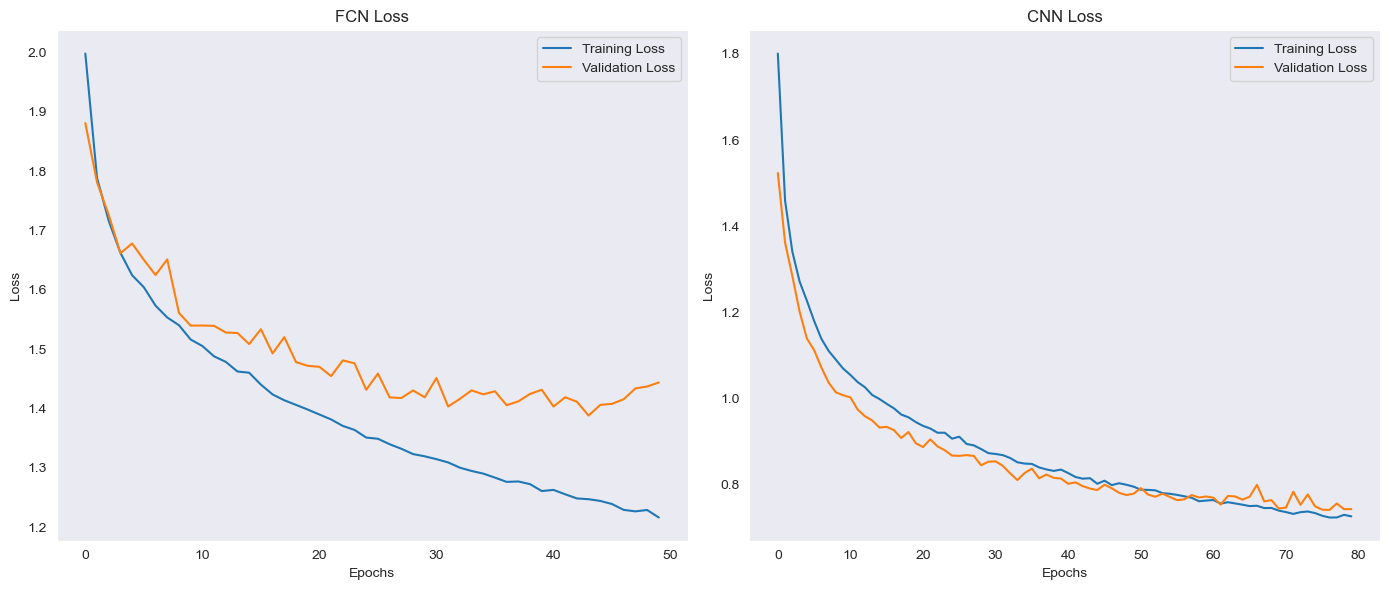

In [39]:
# Load results from dictionary
fcn_accuracy = fcn_results["accuracy"]
fcn_time = fcn_results["time"]
fcn_history = fcn_results["history"]

cnn_accuracy = cnn_results["accuracy"]
cnn_time = cnn_results["time"]
cnn_history = cnn_results["history"]

# Convert training time to minutes and seconds
fcn_minutes, fcn_seconds = divmod(fcn_time, 60)
cnn_minutes, cnn_seconds = divmod(cnn_time, 60)

# Print results
print(f"FCN Test accuracy: {fcn_accuracy}")
print(f"CNN Test accuracy: {cnn_accuracy}")
print(f"FCN Training time: {int(fcn_minutes)} minutes and {int(fcn_seconds)} seconds")
print(f"CNN Training time: {int(cnn_minutes)} minutes and {int(cnn_seconds)} seconds")
print(f"FCN Number of parameters: {model_fcn.count_params()}")
print(f"CNN Number of parameters: {model_cnn.count_params()}")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# FCN Loss
axes[0].plot(fcn_history["loss"], label="Training Loss")
axes[0].plot(fcn_history["val_loss"], label="Validation Loss")
axes[0].set_title('FCN Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid()

# CNN Loss
axes[1].plot(cnn_history["loss"], label="Training Loss")
axes[1].plot(cnn_history["val_loss"], label="Validation Loss")
axes[1].set_title('CNN Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()